In [99]:
# Manipulacion
import pandas as pd
import numpy as np

# Visualización
import seaborn as sns
import matplotlib.pyplot as plt

# Métricas 
from sklearn import metrics
from sklearn import model_selection
from sklearn.metrics import confusion_matrix # Matriz confusion
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, \
                            silhouette_score, recall_score, precision_score, make_scorer, \
                            roc_auc_score, f1_score, precision_recall_curve
from sklearn.metrics import accuracy_score, roc_auc_score, \
                            classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')
import pickle
from sklearn.metrics import ConfusionMatrixDisplay
import re
import matplotlib
from matplotlib_dashboard import MatplotlibDashboard
%load_ext autotime

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 0 ns (started: 2021-12-12 19:40:53 +01:00)


In [100]:
# Function to load models
def cargar_modelo(ruta):
    return pickle.load(open(ruta, 'rb'))

time: 16 ms (started: 2021-12-12 19:40:53 +01:00)


In [101]:
# Function to evaluate model results
def evaluate_model(ytest, ypred, ypred_proba = None):
    if ypred_proba is not None:
        print('ROC-AUC score of the model: {}'.format(roc_auc_score(ytest, ypred_proba[:, 1])))
    print('Accuracy of the model: {}\n'.format(accuracy_score(ytest, ypred)))
    print('Classification report: \n{}\n'.format(classification_report(ytest, ypred)))
        

def model_analysis(modelo):
    matplotlib.rcParams['figure.figsize'] = (9, 9)
    ypred = modelo.predict(xtest)
    ypred_proba = modelo.predict_proba(xtest)
    # keep probabilities for the positive outcome only
    yhat = ypred_proba[:, 1]
    # calculate roc curves
    fpr, tpr, thresholds = roc_curve(ytest, yhat)
    # plot the roc curve for the model
    plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
    plt.plot(fpr, tpr, marker='.', label=re.findall('^[A-z]+', str(modelo)))
    # axis labels
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    # show the plot
    plt.show()

    gmeans = np.sqrt(tpr * (1-fpr))
    # locate the index of the largest g-mean
    ix = np.argmax(gmeans)
    
    #print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))

    # plot the roc curve for the model
    plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
    plt.plot(fpr, tpr, marker='.', label=re.findall('^[A-z]+', str(modelo)))
    plt.scatter(fpr[ix], tpr[ix], s=100, marker='o', color='black', label='Best')
    # axis labels
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    # show the plot
    plt.show()

    ypred_new_threshold = (ypred_proba[:,1]>thresholds[ix]).astype(int)

    # Plot non-normalized confusion matrix
    titles_options = [("Confusion matrix, without normalization", None),
                    ("Normalized confusion matrix", 'true')]

    for title, normalize in titles_options:
        fig, ax = plt.subplots(figsize=(10, 10))
        disp = ConfusionMatrixDisplay.from_predictions(ytest, ypred_new_threshold,
                                    cmap=plt.cm.Greens,
                                    normalize=normalize,
                                    ax = ax)
        ax.set_title(title)
    

    
    evaluate_model(ytest,ypred_new_threshold,ypred_proba)

    

time: 0 ns (started: 2021-12-12 19:40:53 +01:00)


# Cargamos datos

In [102]:
# Load train and test data
xtrain = pd.read_parquet("../data/xtrain.parquet")
ytrain = pd.read_parquet("../data/ytrain.parquet")
xtest = pd.read_parquet("../data/xtest.parquet")
ytest = pd.read_parquet("../data/ytest.parquet")

time: 453 ms (started: 2021-12-12 19:40:54 +01:00)


In [103]:
# Load model data
random_forest = cargar_modelo("../models/RandomForest.pickle")
xgboost = cargar_modelo("../models/XGBoost.pickle")
lightgbm = cargar_modelo("../models/LightGBM.pickle")
adaboost = cargar_modelo("../models/AdaBoost.pickle")
catboost = cargar_modelo("../models/CatBoost.pickle")
base = cargar_modelo("../models/NaiveBayes.pickle")

time: 1.64 s (started: 2021-12-12 19:40:54 +01:00)


# Modelos

## Modelo base (Naive-Bayes)

## Random Forest

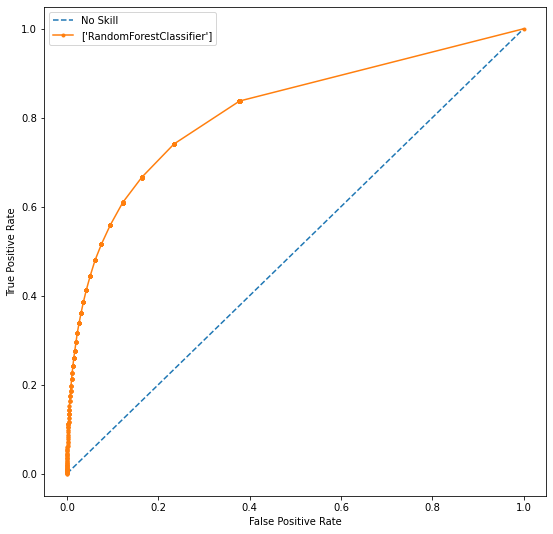

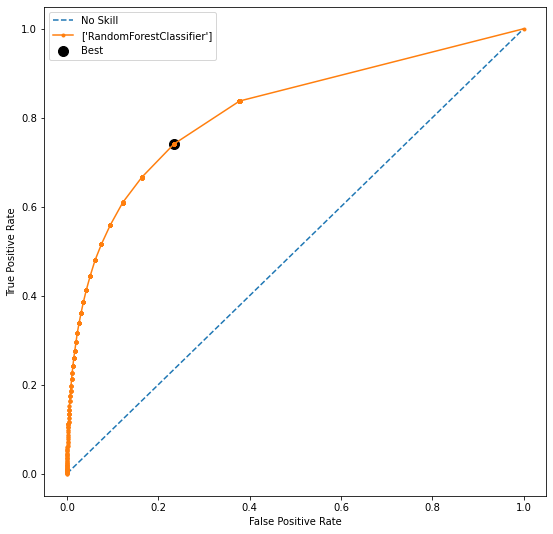

ROC-AUC score of the model: 0.8150581035488025
Accuracy of the model: 0.7658821757710567

Classification report: 
              precision    recall  f1-score   support

           0       0.99      0.77      0.87    797650
           1       0.05      0.74      0.09     12472

    accuracy                           0.77    810122
   macro avg       0.52      0.75      0.48    810122
weighted avg       0.98      0.77      0.85    810122




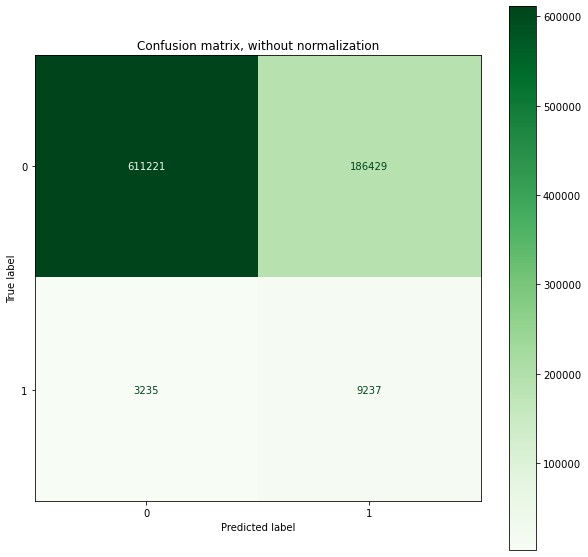

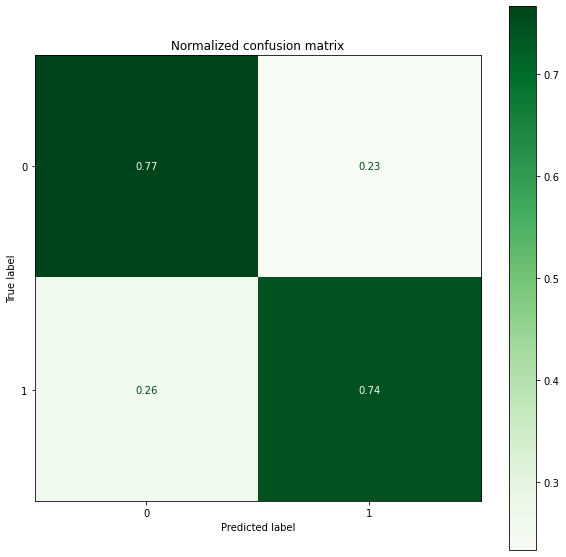

time: 14.8 s (started: 2021-12-12 19:40:56 +01:00)


In [104]:
model_analysis(random_forest)

## XGBoost

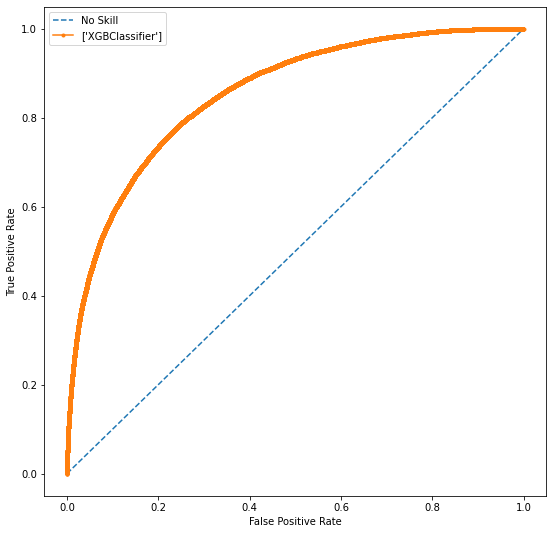

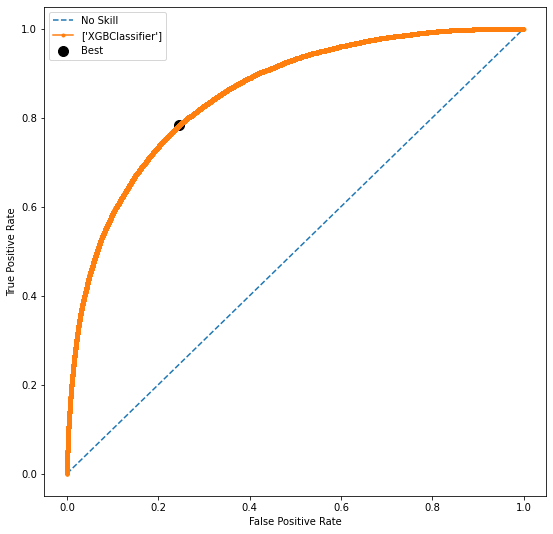

ROC-AUC score of the model: 0.8536524588223738
Accuracy of the model: 0.7553183347693311

Classification report: 
              precision    recall  f1-score   support

           0       1.00      0.75      0.86    797650
           1       0.05      0.78      0.09     12472

    accuracy                           0.76    810122
   macro avg       0.52      0.77      0.47    810122
weighted avg       0.98      0.76      0.85    810122




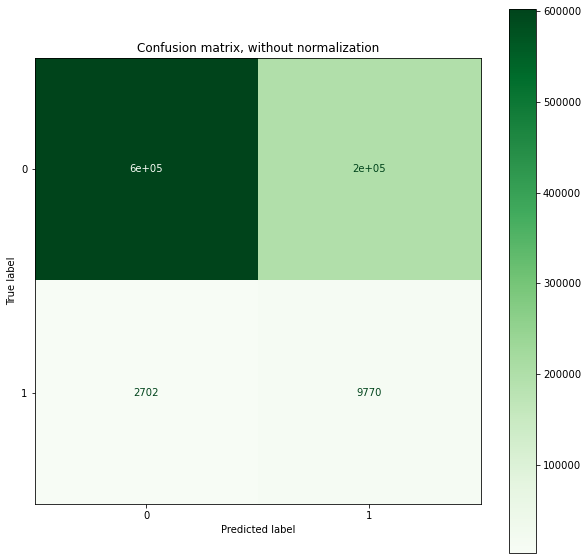

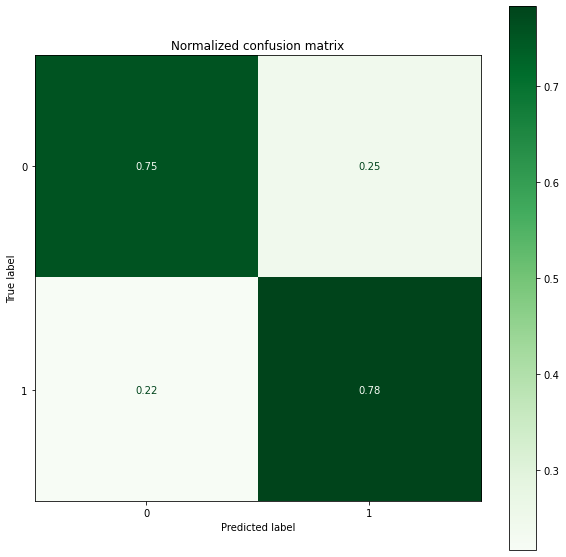

time: 3.98 s (started: 2021-12-12 19:41:11 +01:00)


In [105]:
model_analysis(xgboost)

## LightGBM

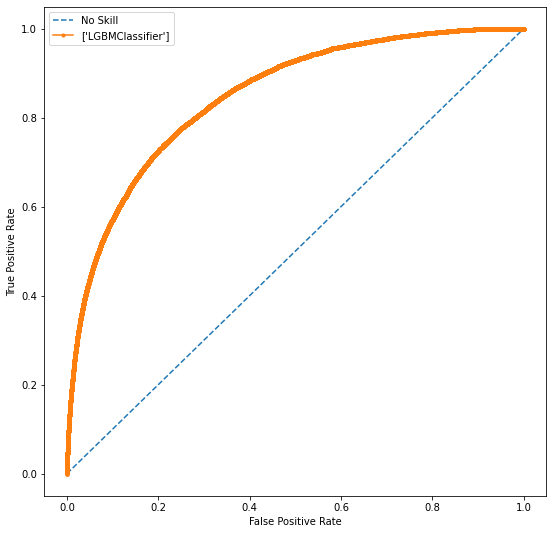

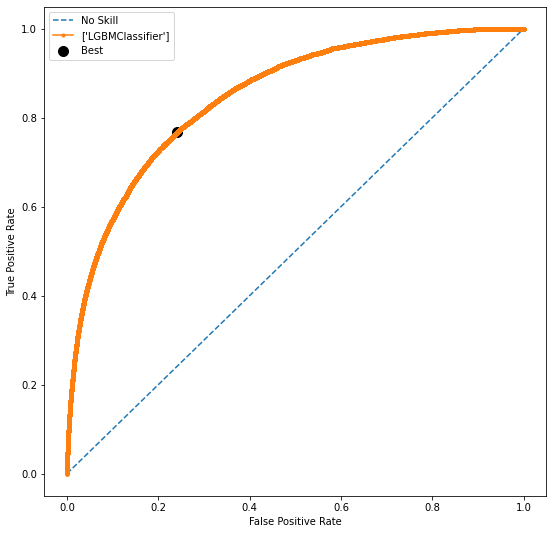

ROC-AUC score of the model: 0.8485746431939847
Accuracy of the model: 0.7598337040593885

Classification report: 
              precision    recall  f1-score   support

           0       1.00      0.76      0.86    797650
           1       0.05      0.77      0.09     12472

    accuracy                           0.76    810122
   macro avg       0.52      0.76      0.48    810122
weighted avg       0.98      0.76      0.85    810122




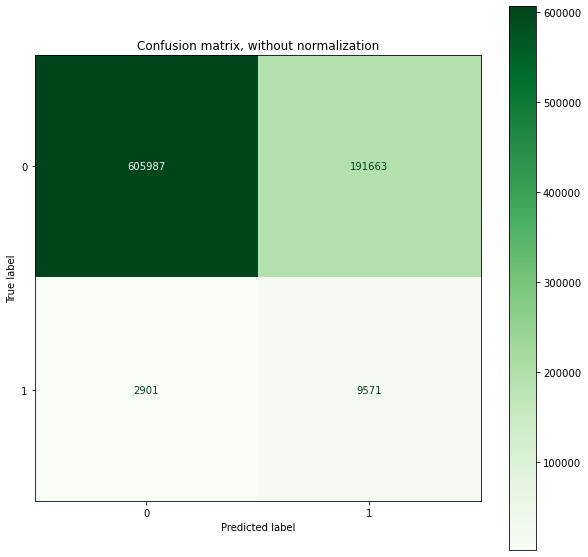

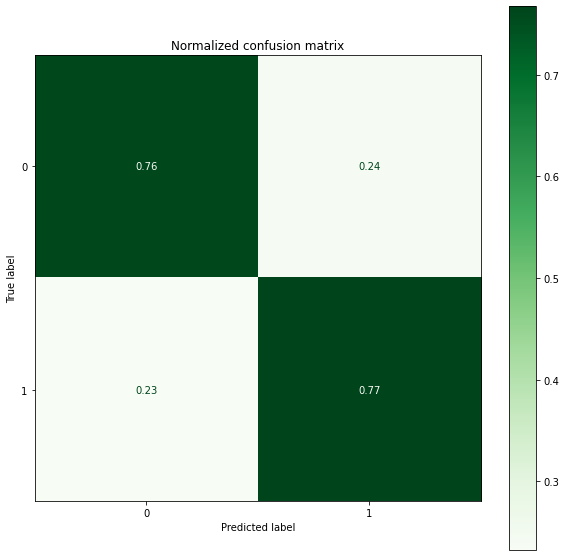

time: 4.99 s (started: 2021-12-12 19:41:15 +01:00)


In [106]:
model_analysis(lightgbm)

## ADABoost

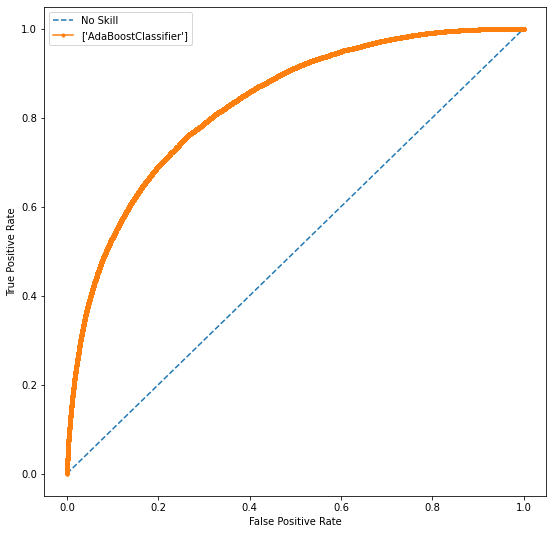

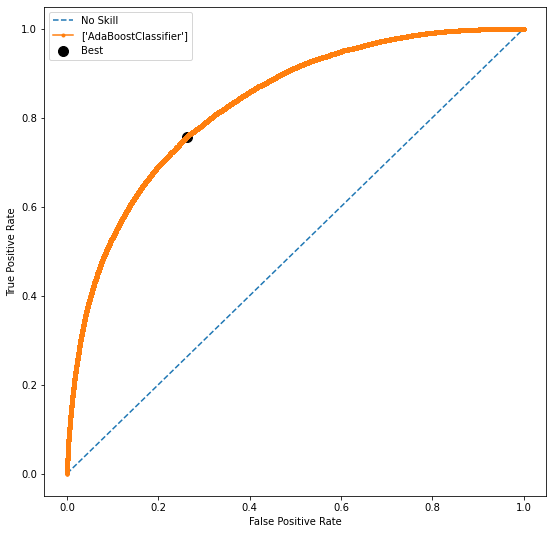

ROC-AUC score of the model: 0.8305004665726097
Accuracy of the model: 0.7373383268199111

Classification report: 
              precision    recall  f1-score   support

           0       0.99      0.74      0.85    797650
           1       0.04      0.76      0.08     12472

    accuracy                           0.74    810122
   macro avg       0.52      0.75      0.46    810122
weighted avg       0.98      0.74      0.83    810122




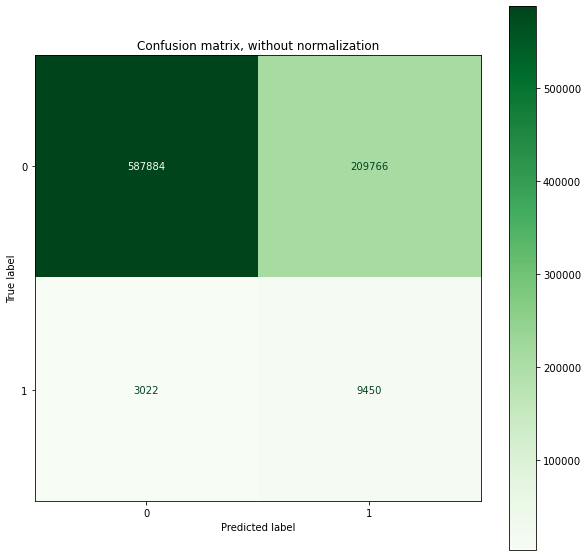

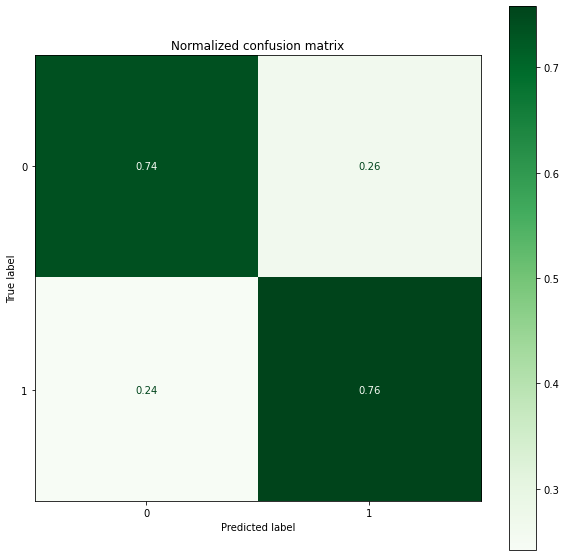

time: 45.6 s (started: 2021-12-12 19:41:20 +01:00)


In [107]:
model_analysis(adaboost)

## CatBoost

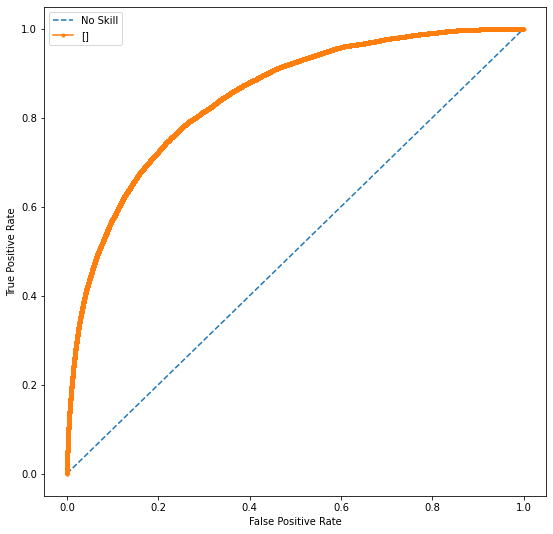

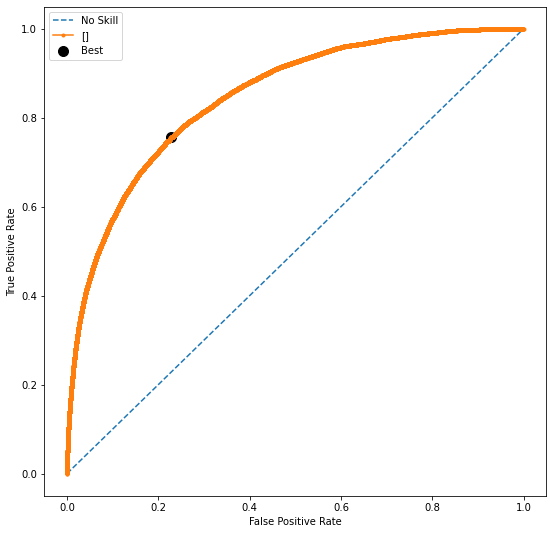

ROC-AUC score of the model: 0.8477362636504353
Accuracy of the model: 0.7712060652593066

Classification report: 
              precision    recall  f1-score   support

           0       1.00      0.77      0.87    797650
           1       0.05      0.76      0.09     12472

    accuracy                           0.77    810122
   macro avg       0.52      0.76      0.48    810122
weighted avg       0.98      0.77      0.86    810122




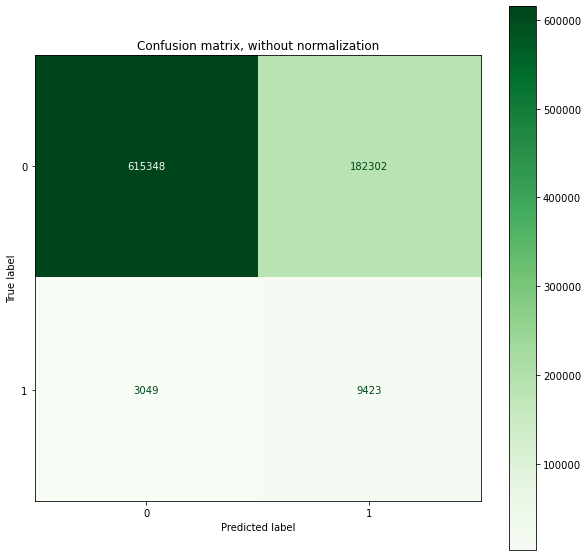

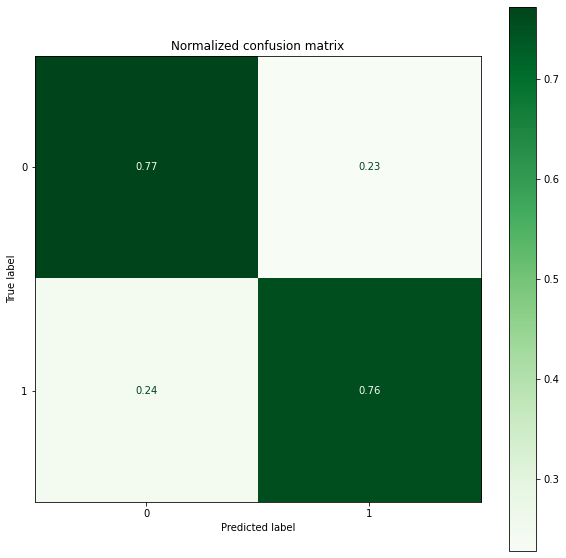

time: 3.12 s (started: 2021-12-12 19:42:05 +01:00)


In [108]:
model_analysis(catboost)

## Resumen comparativo

In [109]:
%time
# Tabla con los datos de cada modelo

datos_modelos = {'Modelo': ['Modelo1', 'Modelo2', 'Modelo3', 'Modelo4', 'Modelo5'],
                
                'Accuracy': ['X', 'X', 'X', 'X', 'X'],
                
                'Área ROC': ['X', 'X', 'X', 'X', 'X'],
                
                'False positives': ['X', 'X', 'X', 'X', 'X'],
                
                'True negatives': ['X', 'X', 'X', 'X', 'X']}

tabla_modelos = pd.DataFrame(datos_modelos, columns=['Modelo', 'Accuracy', 'Área ROC', 'False positives',
                                                    'True negatives'])

tabla_modelos

Wall time: 0 ns


,Modelo,Accuracy,Área ROC,False positives,True negatives
0,Modelo1,X,X,X,X
1,Modelo2,X,X,X,X
2,Modelo3,X,X,X,X
3,Modelo4,X,X,X,X
4,Modelo5,X,X,X,X


time: 0 ns (started: 2021-12-12 19:42:09 +01:00)
